120x120 image -> 40x40 per tile -> 4x(10x10)patches per tile

tensor([[[[0.7412, 0.7647, 0.7059,  ..., 0.6118, 0.6431, 0.6314],
          [0.7373, 0.7098, 0.7686,  ..., 0.5804, 0.6157, 0.6431],
          [0.6667, 0.6902, 0.7490,  ..., 0.6863, 0.6745, 0.6941],
          ...,
          [0.7843, 0.7961, 0.6902,  ..., 0.6941, 0.7373, 0.7412],
          [0.7961, 0.8039, 0.7451,  ..., 0.6902, 0.6745, 0.8196],
          [0.7255, 0.8039, 0.7765,  ..., 0.7059, 0.6431, 0.8157]],

         [[0.6941, 0.7098, 0.6471,  ..., 0.5765, 0.6157, 0.6235],
          [0.6824, 0.6471, 0.6980,  ..., 0.5412, 0.5882, 0.6314],
          [0.6078, 0.6235, 0.6784,  ..., 0.6431, 0.6392, 0.6706],
          ...,
          [0.7373, 0.7608, 0.6706,  ..., 0.6275, 0.6706, 0.6745],
          [0.7490, 0.7647, 0.7176,  ..., 0.6235, 0.6118, 0.7569],
          [0.6824, 0.7647, 0.7451,  ..., 0.6392, 0.5804, 0.7608]],

         [[0.5686, 0.5373, 0.4275,  ..., 0.3216, 0.3490, 0.3294],
          [0.5451, 0.4706, 0.4824,  ..., 0.2941, 0.3294, 0.3490],
          [0.4549, 0.4392, 0.4588,  ..., 0

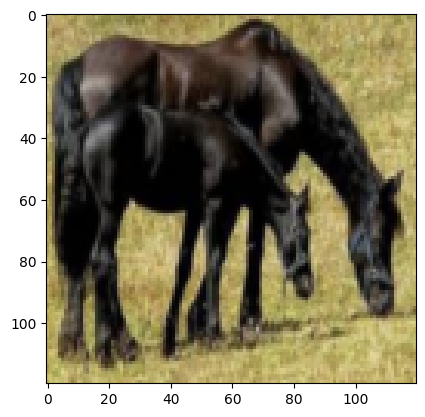

In [149]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
image_path = '../vig_pytorch/test2.png'
# IMAGENET_DEFAULT_MEAN = (0.50451443, 0.49363898, 0.41293754)
# IMAGENET_DEFAULT_STD = (0.5, 0.5, 0.5)

def preprocess_image_manual(image_path, input_size=(120, 120)):
    # Define the transformation
    transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),

    ])
    
    # Load the image
    image = Image.open(image_path).convert('RGBA')  # Convert to RGB
    
    # Apply the transformations to the image
    tensor_image = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Move the tensor to the GPU if available
    tensor_image = tensor_image.cuda() if torch.cuda.is_available() else tensor_image
    
    return tensor_image

# Correct the path to the uploaded file
preprocessed_image = preprocess_image_manual(image_path)
print(preprocessed_image)
image = to_pil_image(preprocessed_image.squeeze(0)) 
plt.imshow(image)


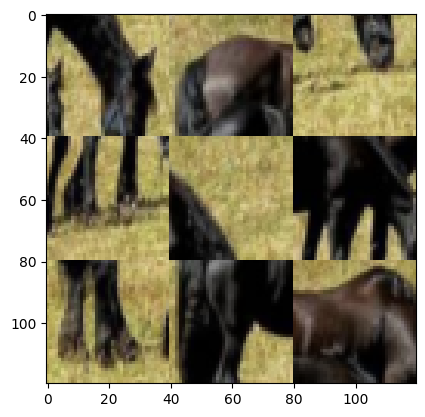

In [150]:
import torch
import numpy as np
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

def create_jigsaw_tiles(image_tensor, tile_size=(40, 40)):
    _, _, H, W = image_tensor.shape
    num_tiles_h = H // tile_size[0]
    num_tiles_w = W // tile_size[1]
    
    # Initialize a list to hold the tiles
    tiles = []
    
    # Cut the image into tiles
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            h_start = i * tile_size[0]
            w_start = j * tile_size[1]
            h_end = h_start + tile_size[0]
            w_end = w_start + tile_size[1]
            tiles.append(image_tensor[:, :, h_start:h_end, w_start:w_end])
    
    # Shuffle the tiles
    np.random.shuffle(tiles)
    
    # Reassemble the image
    rows = []
    for i in range(0, len(tiles), num_tiles_w):
        row = torch.cat(tiles[i:i+num_tiles_w], dim=3)
        rows.append(row)
    shuffled_image = torch.cat(rows, dim=2)
    
    return shuffled_image

# Assuming 'preprocessed_image' is your input image tensor
# You might need to adjust this part based on how you get or process your image
shuffled_image = create_jigsaw_tiles(preprocessed_image)
image = to_pil_image(shuffled_image.squeeze(0)) 
plt.imshow(image)


# Note: This function will not directly work on images that do not conform to the expected dimensions (120x120) or on non-tensor objects


In [151]:
import matplotlib.pyplot as plt


import numpy as np
from numpy.random import default_rng  # For reproducible shuffling

def make_patches(image):

    patch_size = 10  # Size of each patch
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patches.append(image[i:i+patch_size, j:j+patch_size])
    return np.array(patches)

make_patches(shuffled_image[0][1])



array([[[0.00392157, 0.01568628, 0.00784314, ..., 0.01176471,
         0.00784314, 0.00392157],
        [0.00784314, 0.00784314, 0.00392157, ..., 0.        ,
         0.00392157, 0.00784314],
        [0.01176471, 0.00784314, 0.01176471, ..., 0.        ,
         0.00392157, 0.01568628],
        ...,
        [0.03137255, 0.2901961 , 0.6       , ..., 0.03921569,
         0.01960784, 0.01176471],
        [0.10588235, 0.46666667, 0.627451  , ..., 0.16470589,
         0.02745098, 0.01568628],
        [0.2509804 , 0.5294118 , 0.6392157 , ..., 0.49019608,
         0.16470589, 0.02352941]],

       [[0.01176471, 0.01960784, 0.04705882, ..., 0.19215687,
         0.22352941, 0.24313726],
        [0.01176471, 0.00784314, 0.01568628, ..., 0.14509805,
         0.18039216, 0.23137255],
        [0.01568628, 0.00784314, 0.00784314, ..., 0.10980392,
         0.23921569, 0.20784314],
        ...,
        [0.03137255, 0.02352941, 0.00784314, ..., 0.0627451 ,
         0.02352941, 0.05490196],
        [0.0

In [152]:
import sys
sys.path.append('../vig_pytorch')
from vig import Grapher
num_patches = (120 // 10) * (120 // 10)

grapher_module = Grapher(
    in_channels=4,         # RGB image has 3 channels
    kernel_size=3,         # A common choice, could be different based on your architecture
    dilation=1,            # Standard dilation
    conv='edge',           # Replace 'edge' with the actual type used in your model
    act='relu',            # A common activation function
    norm=None,             # Depends on whether you want to use normalization
    bias=True,             # Typically, biases are used
    stochastic=False,      # If stochastic depth is not used
    epsilon=0.0,           # Hyperparameter for the edge convolution
    r=1,                   # Downsampling rate
    n=num_patches,         # Number of nodes
    drop_path=0.0,         # Drop path rate for stochastic depth
    relative_pos=True,
    # groups = 1     # Set to True if the model uses relative positions
)

# Assuming `preprocessed_image` is the image tensor you've got from the preprocessing step
# And it should be of shape [1, C, H, W] where C is the number of channels, H and W are height and width

# The grapher_module is designed to be a part of a larger model, so you would typically not use it standalone.
# However, for the purpose of this illustration, we are showing its usage directly
# You should incorporate this into the appropriate place in your model's `forward` method
# print('hi')
# Move the grapher module to the same device as the image
grapher_module = grapher_module.to(shuffled_image.device)
print(grapher_module)

# Pass the preprocessed image through the grapher module
# This should give you the output with the graph convolutions applied
graph_output = grapher_module(shuffled_image)


using relative_pos
Grapher(
  (fc1): Sequential(
    (0): Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (graph_conv): DyGraphConv2d(
    (gconv): EdgeConv2d(
      (nn): BasicConv(
        (0): Conv2d(8, 8, kernel_size=(1, 1), stride=(1, 1), groups=4)
        (1): ReLU()
      )
    )
    (dilated_knn_graph): DenseDilatedKnnGraph(
      (_dilated): DenseDilated()
    )
  )
  (fc2): Sequential(
    (0): Conv2d(8, 4, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (drop_path): Identity()
)
hi


In [153]:
graph_output.shape
import torch.nn as nn

# Assuming `graph_output` is your [1, 4, 120, 120] tensor


# Use adaptive average pooling to reduce the dimensions
# This will aggregate the features within each 10x10 patch
pool = nn.AdaptiveAvgPool2d((12, 12))

# Apply pooling to get the [1, 4, 14, 14] output
pooled_output = pool(graph_output)

print(pooled_output.shape) 

torch.Size([1, 4, 12, 12])


In [154]:
sys.path.append('../vig_pytorch/gcn_lib')
from gcn_lib import DenseDilatedKnnGraph

# Initialize the DenseDilatedKnnGraph module
# Adjust the parameters as needed based on your specific requirements
dense_dilated_knn_graph = DenseDilatedKnnGraph(k=9, dilation=1, stochastic=False, epsilon=0.0)

# Assuming graph_output is your Grapher module output of shape [1, 4, 224, 224]
# Reshape or process graph_output as required to fit the expected input shape of DenseDilatedKnnGraph
# The expected shape might be [batch_size, num_dims, num_points, 1], adjust accordingly

# If you need to flatten or reshape graph_output, ensure it matches the expected dimensions
# For example, if we flatten the spatial dimensions into a single dimension of points:
num_points = pooled_output.shape[2] * pooled_output.shape[3]  # For a 224x224 image, this would be 50176
pooled_output_reshaped = pooled_output.reshape(1, 4, num_points, 1)  # Reshape to [1, 4, 50176, 1]

# Use the module to find edges
edge_index = dense_dilated_knn_graph(pooled_output_reshaped)

# edge_index now contains the indices of edges based on dilated KNN
edge_index.shape

torch.Size([2, 1, 144, 9])

In [155]:
import torch
# Let's say your edge_index is a tensor of shape [2, 1, N, k]
# where N is the number of nodes, and k is the number of nearest neighbors
# Flatten the edge_index to work with it more easily
edge_index_flat = edge_index.view(2, -1)  # This will have shape [2, N*k]
# Now, let's create an adjacency matrix of size [N, N]
# We initialize it to zeros,  assuming no connections
edge_index_flat.shape
k=9
N = edge_index_flat.shape[1] // k  # total number of nodes
print(N)
adjacency_matrix = torch.zeros((N, N))


144


In [156]:
for i in range(edge_index_flat.shape[1]):
    source_node = edge_index_flat[0, i]
    target_node = edge_index_flat[1, i]

    # As edge_index contains indices starting from 0 to N-1
    adjacency_matrix[source_node, target_node] = 1

# If you want an edge list instead, you can simply use the edge_index_flat
edge_list = edge_index_flat.t().tolist() 
# pooled_output_edge = edge_list
adjacency_matrix
edge_list

[[0, 0],
 [82, 0],
 [58, 0],
 [88, 0],
 [80, 0],
 [125, 0],
 [136, 0],
 [13, 0],
 [31, 0],
 [1, 1],
 [142, 1],
 [81, 1],
 [137, 1],
 [59, 1],
 [69, 1],
 [126, 1],
 [140, 1],
 [141, 1],
 [2, 2],
 [36, 2],
 [23, 2],
 [24, 2],
 [77, 2],
 [16, 2],
 [92, 2],
 [28, 2],
 [15, 2],
 [3, 3],
 [139, 3],
 [34, 3],
 [35, 3],
 [9, 3],
 [78, 3],
 [91, 3],
 [79, 3],
 [53, 3],
 [4, 4],
 [67, 4],
 [84, 4],
 [66, 4],
 [9, 4],
 [53, 4],
 [85, 4],
 [54, 4],
 [91, 4],
 [5, 5],
 [11, 5],
 [63, 5],
 [90, 5],
 [32, 5],
 [20, 5],
 [135, 5],
 [133, 5],
 [78, 5],
 [6, 6],
 [39, 6],
 [94, 6],
 [134, 6],
 [123, 6],
 [138, 6],
 [75, 6],
 [108, 6],
 [50, 6],
 [7, 7],
 [52, 7],
 [110, 7],
 [25, 7],
 [127, 7],
 [105, 7],
 [27, 7],
 [21, 7],
 [138, 7],
 [8, 8],
 [93, 8],
 [61, 8],
 [121, 8],
 [131, 8],
 [14, 8],
 [22, 8],
 [43, 8],
 [143, 8],
 [9, 9],
 [53, 9],
 [78, 9],
 [135, 9],
 [55, 9],
 [84, 9],
 [66, 9],
 [54, 9],
 [79, 9],
 [10, 10],
 [131, 10],
 [89, 10],
 [14, 10],
 [143, 10],
 [121, 10],
 [43, 10],
 [57, 10],

In [157]:
num_nodes = 144 #12*12
feature_dimension = 4
graph_features = pooled_output.reshape(1, feature_dimension, num_nodes)

graph_features = graph_features.squeeze(0)  

# If you need to map these features to each node based on your edge list
node_features = {node: [] for node in range(num_nodes)}  # Dictionary to store features for each node

# Assuming 'edge_list' is a list of tuples (target_node_index, source_node_index)
for i in edge_list:
    # Add the source node features to the target node's feature list
    node_features[i[1]].append(graph_features[:, i[0]])
node_features
# tensor([-0.0903,  0.0778, -0.0469,  1.3324]

{0: [tensor([ 0.7155,  0.8431, -0.5362,  0.6977], grad_fn=<SelectBackward0>),
  tensor([ 0.6436,  0.7971, -0.4748,  0.6191], grad_fn=<SelectBackward0>),
  tensor([ 0.8790,  0.8800, -0.5161,  0.6876], grad_fn=<SelectBackward0>),
  tensor([ 0.8081,  0.7879, -0.4963,  0.8084], grad_fn=<SelectBackward0>),
  tensor([ 0.6108,  0.8827, -0.4921,  0.5693], grad_fn=<SelectBackward0>),
  tensor([ 0.8242,  0.7603, -0.4592,  0.8293], grad_fn=<SelectBackward0>),
  tensor([ 0.6472,  0.8097, -0.3036,  0.6020], grad_fn=<SelectBackward0>),
  tensor([ 0.6904,  0.7107, -0.2779,  0.7365], grad_fn=<SelectBackward0>),
  tensor([ 1.0293,  0.8555, -0.3821,  0.5511], grad_fn=<SelectBackward0>)],
 1: [tensor([ 0.8209,  0.5521, -0.2237,  1.0696], grad_fn=<SelectBackward0>),
  tensor([ 0.8361,  0.5619, -0.1348,  1.1048], grad_fn=<SelectBackward0>),
  tensor([ 0.8958,  0.4914, -0.0893,  1.1325], grad_fn=<SelectBackward0>),
  tensor([ 0.8872,  0.5111, -0.0684,  1.1165], grad_fn=<SelectBackward0>),
  tensor([ 0.9093,

5 0
5 0
2 4
5 0
1 4
5 0
5 2
5 0
3 5
5 0
2 6
5 0
1 11
5 0
7 3
5 0
3 6
5 0


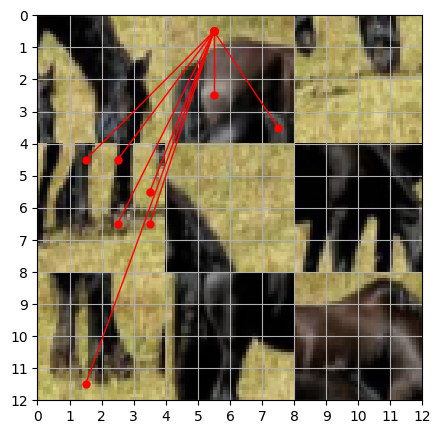

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming preprocessed_image is defined. Replace the next line with actual image loading if necessary.
image_array = image  # Placeholder for the actual image

grid_size = 13  # Grid size for the 14x14 grid

# Example edge cases
edge_nine = [[5, 5],
 [50, 5],
 [49, 5],
 [29, 5],
 [63, 5],
 [74, 5],
 [133, 5],
 [43, 5],
 [75, 5],
]

# edge_nine = [[0,29],[0,15],[0,44],[0,59]]

# Display the image as a background
fig, ax = plt.subplots(figsize=(5, 5))
plt.imshow(image_array, extent=[0, grid_size-1, grid_size-1, 0])

# Setting axis limits and aspect ratio
ax.set_xlim([0, grid_size-1])
ax.set_ylim([0, grid_size-1])
ax.set_aspect('equal')
# Inverting y-axis to have (0,0) at top-left
ax.set_ylim(ax.get_ylim()[::-1])

# Setting ticks for a clearer grid representation
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))

# Predefined values that require adjustment
# adjust_values = [14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194]

# Overlay the connections on top of the image
for conn in edge_nine:

    x1, y1 = ((conn[0]) % 12, (conn[0]) // 12)
    x2, y2 = ((conn[1]) % 12, (conn[1]) // 12)

    print(x1,y1)
    print(x2,y2)
    
    # Check if adjustments are needed for x1 and x2
    # if conn[0] in adjust_values:
    #     x1_adjust = x1 - 0.5
    # else:
    x1_adjust = x1 + 0.5
        
    # if conn[1] in adjust_values:
    #     x2_adjust = x2 - 0.5
    # else:
    x2_adjust = x2 + 0.5
    
    plt.plot([x1_adjust, x2_adjust], [y1 + 0.5, y2 + 0.5], marker='o', markersize=5, linestyle='-', color='red', linewidth=1)

plt.grid(True)
plt.show()
